---
# Statistical Learning Course - Spring 2023
---
# Niloufar Abbasi
---

### libraries :

In [156]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.preprocessing   import MinMaxScaler
from sklearn.ensemble        import RandomForestClassifier
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import GridSearchCV

In [157]:
train_df = pd.read_csv('E:\\sharif\\Statistical_Learning\\HW\\HW5\\Q6\\train.csv')
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [158]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
train_df.shape

(891, 12)

In [160]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# (A) Preprocessing

Filling Missing Values:

Fare Column: Check if there are any missing values (NaN) in the Fare column. If any NaN values are present, fill them with the mean fare calculated from the training dataset. This mean fare is computed for use in the test dataset as well.

In [161]:
# Check if there are any NaN values in the Fare column
if train_df['Fare'].isna().any():
    print("There are NaN values in Fare column")
else:
    print("There are no NaN values in Fare column")

There are no NaN values in Fare column


In [162]:
fare_mean = train_df['Fare'].mean() # For future use on test data

Embarked Column: Identify the most frequent embarkation port to fill missing values in the Embarked column. Ensure that any invalid values are replaced with the most common port.

In [163]:
# check the values of the 'Embarked' column
print(train_df['Embarked'].unique())

# replace any values that are not in the list ['S', 'C', 'Q'] with 'S'
train_df.loc[~train_df['Embarked'].isin(['S', 'C', 'Q']), 'Embarked'] = 'S'

# print the updated train_dfFrame
Embarked_values = train_df['Embarked'].value_counts()
print(Embarked_values)

['S' 'C' 'Q' nan]
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [164]:
# Check if there are any NaN values in the Embarked column

if train_df['Embarked'].isna().any():
    print("There are NaN values in column")
else:
    print("There are no NaN values in column")

There are no NaN values in column


Filling Missing Age Values:

Age by Title: For passengers with missing age values, use their title (e.g., Mr, Mrs, Miss) to impute age. Calculate the mean age for each title and fill missing values accordingly. This approach ensures that the missing age data is filled based on similar passengers' ages.

In [165]:
# Find passengers with "Mr" in their name and missing age values
mr_mask = train_df['Name'].str.contains('Mr')
age_mask = train_df['Age'].isnull()
mr_na_mask = mr_mask & age_mask

# Calculate the mean age of passengers with "Mr" in their name
mr_mean_age = train_df.loc[mr_mask, 'Age'].mean()

# Replace missing age values for Mr's with the mean age
train_df.loc[mr_na_mask, 'Age'] = mr_mean_age

In [166]:
mr_mean_age

33.11839530332681

In [167]:
# Find passengers with "Mrs" in their name and missing age values
Mrs_mask = train_df['Name'].str.contains('Mrs')
age_mask = train_df['Age'].isnull()
Mrs_na_mask = Mrs_mask & age_mask

# Calculate the mean age of passengers with "Mrs" in their name
Mrs_mean_age = train_df.loc[Mrs_mask, 'Age'].mean()

# Replace missing age values for Mrs's with the mean age
train_df.loc[Mrs_na_mask, 'Age'] = Mrs_mean_age

In [168]:
Mrs_mean_age

35.31017612524462

In [169]:
# Find passengers with "Dr" in their name and missing age values
Dr_mask = train_df['Name'].str.contains('Dr')
age_mask = train_df['Age'].isnull()
Dr_na_mask = Dr_mask & age_mask

# Calculate the mean age of passengers with "Dr" in their name
Dr_mean_age = train_df.loc[Dr_mask, 'Age'].mean()

# Replace missing age values for Dr's with the mean age
train_df.loc[Dr_na_mask, 'Age'] = Dr_mean_age

In [170]:
Dr_mean_age

39.44444444444444

In [171]:
# Find passengers with "Miss" in their name and missing age values
Miss_mask = train_df['Name'].str.contains('Miss')
age_mask = train_df['Age'].isnull()
Miss_na_mask = Miss_mask & age_mask

# Calculate the mean age of passengers with "Miss" in their name
Miss_mean_age = train_df.loc[Miss_mask, 'Age'].mean()

# Replace missing age values for Miss's with the mean age
train_df.loc[Miss_na_mask, 'Age'] = Miss_mean_age

In [172]:
Miss_mean_age

21.894179894179892

In [173]:
# Find passengers with "Master" in their name and missing age values
Master_mask = train_df['Name'].str.contains('Master')
age_mask = train_df['Age'].isnull()
Master_na_mask = Master_mask & age_mask

# Calculate the mean age of passengers with "Master" in their name
Master_mean_age = train_df.loc[Master_mask, 'Age'].mean()

# Replace missing age values for Master's with the mean age
train_df.loc[Master_na_mask, 'Age'] = Master_mean_age

In [174]:
Master_mean_age

4.574166666666667

In [175]:
# Find passengers with "Ms" in their name and missing age values
Ms_mask = train_df['Name'].str.contains('Ms')
age_mask = train_df['Age'].isnull()
Ms_na_mask = Ms_mask & age_mask

# Calculate the mean age of passengers with "Ms" in their name
Ms_mean_age = train_df.loc[Ms_mask, 'Age'].mean()

# Replace missing age values for Ms's with the mean age
train_df.loc[Ms_na_mask, 'Age'] = Ms_mean_age

In [176]:
Ms_mean_age

28.0

In [177]:
# Check again if there are any NaN values in the Age column

if train_df['Age'].isna().any():
    print("There are NaN values in Age column")
else:
    print("There are no NaN values in Age column")

There are no NaN values in Age column


Handling Cabin Data:

Cabin Number: Fill missing cabin numbers with 'X'. For existing cabin numbers, retain only the first letter. For passengers with high fare but missing cabin data, assign cabin 'B' or 'C' based on fare.

Assigning Cabins to High-Fare Passengers with Missing Cabin Information
In this step, we handle passengers who have missing cabin information but have paid a high fare. The assumption is that these passengers might have had a cabin but it was not recorded. Therefore, we assign them to cabins 'B' or 'C' based on their fare:

Identify High-Fare Passengers with Missing Cabin Information:
Passengers who do not have a recorded cabin (denoted as 'X') and have paid a high fare (greater than 50) are selected.
Assign Cabins 'B' or 'C':
For these identified passengers, assign them to cabins 'B' or 'C'. The assignment alternates between 'B' and 'C' to ensure a balanced distribution.

In [178]:
# Replace empty cabin numbers with 'X'
train_df['Cabin'] = train_df['Cabin'].fillna('X')

# Keep only the first letter of the cabin number
train_df['Cabin'] = train_df['Cabin'].str[0]

# Identify passengers who paid a high fare but do not have a cabin number
high_fare_no_cabin = (train_df['Cabin'] == 'X') & (train_df['Fare'] > 50)

# Assign cabin B or C to high fare passengers without a cabin number
train_df.loc[high_fare_no_cabin, 'Cabin'] = ['B' if i % 2 == 0 else 'C' for i in range(sum(high_fare_no_cabin))]


To ensure that there are no missing values remaining in the Cabin column after our preprocessing steps, we use the following code. This final check confirms that all entries in the column have been filled appropriately:

In [179]:
# Check again if there are any NaN values in the Cabin column

if train_df['Cabin'].isna().any():
    print("There are NaN values in Cabin column")
else:
    print("There are no NaN values in Cabin column")

There are no NaN values in Cabin column


Splitting and Cleaning Ticket Data:

Ticket Column: Split the Ticket column into two new columns: one for the first character of the ticket and another for the rest of the ticket number. Drop the original Ticket column.

In [180]:
# extract ticket type and length
train_df['Ticket_FirstLetter'] = train_df['Ticket'].str[0]
train_df['Ticket_characters'] = train_df['Ticket'].str[1:]

# drop the original ticket column
train_df.drop('Ticket', axis=1, inplace=True)

Dropping Unnecessary Columns:

Name Column: Drop the Name column as it is not considered important for survival prediction.

In [181]:
# drop the original Name column
train_df.drop('Name', axis=1, inplace=True)

To observe the changes made during the preprocessing steps, we print the updated training DataFrame.
This allows us to verify that the transformations, such as filling missing values and modifying columns, have been applied correctly.

In [182]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_FirstLetter,Ticket_characters
0,1,0,3,male,22.000000,1,0,7.2500,X,S,A,/5 21171
1,2,1,1,female,38.000000,1,0,71.2833,C,C,P,C 17599
2,3,1,3,female,26.000000,0,0,7.9250,X,S,S,TON/O2. 3101282
3,4,1,1,female,35.000000,1,0,53.1000,C,S,1,13803
4,5,0,3,male,35.000000,0,0,8.0500,X,S,3,73450
5,6,0,3,male,33.118395,0,0,8.4583,X,Q,3,30877
6,7,0,1,male,54.000000,0,0,51.8625,E,S,1,7463
7,8,0,3,male,2.000000,3,1,21.0750,X,S,3,49909
8,9,1,3,female,27.000000,0,2,11.1333,X,S,3,47742
9,10,1,2,female,14.000000,1,0,30.0708,X,C,2,37736


# Test Data Preparation:

Apply the same preprocessing steps to the test dataset as done for the training dataset. Extract labels from an Excel file and merge them into the test dataset. Fill missing values and process data similarly.

In [183]:
# read the Excel file and select relevant columns
excel_data = pd.read_excel('E:\\sharif\\Statistical_Learning\\HW\\HW5\\Q6\\titanic3.xls', usecols=['name', 'survived'])

# read the CSV test data
test_data = pd.read_csv('E:\\sharif\\Statistical_Learning\\HW\\HW5\\Q6\\test.csv')

# create a new column in the test data frame for the "Survived" labels
test_data['Survived'] = None

# loop through the rows in the test data and search for the name in the Excel data
for index, row in test_data.iterrows():
    search_name = row['Name']
    survived_label = excel_data.loc[excel_data['name'] == search_name, 'survived'].values
    if survived_label.size > 0:
        test_data.at[index, 'Survived'] = survived_label[0]

# save the updated test data frame to a new CSV file
test_data.to_csv('E:\\sharif\\Statistical_Learning\\HW\\HW5\\Q6\\updated_test.csv', index=False)


test_df = pd.read_csv('E:\\sharif\\Statistical_Learning\\HW\\HW5\\Q6\\updated_test.csv')
test_df.head(90)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,977,3,"Khalil, Mr. Betros",male,NaN,1,0,2660,14.4542,NaN,C,0.0
86,978,3,"Barry, Miss. Julia",female,27.0,0,0,330844,7.8792,NaN,Q,0.0
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.0500,NaN,S,1.0
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,0.0


In [184]:
test_df['Fare'] = test_df['Fare'].fillna(fare_mean)
# ----------------------------------------------------------
test_df['Embarked'] = test_df['Embarked'].fillna('S')
# -----------------------------------------------------------
# Find passengers with "Mr" in their name and missing age values
test_mr_mask = test_df['Name'].str.contains('Mr')
test_age_mask = test_df['Age'].isna()
test_mr_na_mask = test_mr_mask & test_age_mask
# Replace missing age values for Mr's with the mean age that we found from train set
test_df.loc[test_mr_na_mask, 'Age'] = mr_mean_age
# ------------------------------------------------------------
# Find passengers with "Mrs" in their name and missing age values
test_Mrs_mask = test_df['Name'].str.contains('Mrs')
test_age_mask = test_df['Age'].isnull()
test_Mrs_na_mask = test_Mrs_mask & test_age_mask
# Replace missing age values for Mrs's with the mean age that we found from train set
test_df.loc[test_Mrs_na_mask, 'Age'] = Mrs_mean_age
# -------------------------------------------------------------
# Find passengers with "Dr" in their name and missing age values
test_Dr_mask = test_df['Name'].str.contains('Dr')
test_age_mask = test_df['Age'].isnull()
test_Dr_na_mask = test_Dr_mask & test_age_mask
# Replace missing age values for Dr's with the mean age that we found from train set
test_df.loc[test_Dr_na_mask, 'Age'] = Dr_mean_age
# --------------------------------------------------------------
# Find passengers with "Miss" in their name and missing age values
test_Miss_mask = test_df['Name'].str.contains('Miss')
test_age_mask = test_df['Age'].isnull()
test_Miss_na_mask = test_Miss_mask & test_age_mask
# Replace missing age values for Miss's with the mean age that we found from train set
test_df.loc[test_Miss_na_mask, 'Age'] = Miss_mean_age
# ----------------------------------------------------------------
# Find passengers with "Master" in their name and missing age values
test_Master_mask = test_df['Name'].str.contains('Master')
test_age_mask = test_df['Age'].isnull()
test_Master_na_mask = test_Master_mask & test_age_mask
# Replace missing age values for Master's with the mean age that we found from train set
test_df.loc[test_Master_na_mask, 'Age'] = Master_mean_age
# ---------------------------------------------------------------------
# Find passengers with "Ms" in their name and missing age values
test_Ms_mask = test_df['Name'].str.contains('Ms')
test_age_mask = test_df['Age'].isnull()
test_Ms_na_mask = test_Ms_mask & test_age_mask
# Replace missing age values for Ms's with the mean age that we found from train set
test_df.loc[test_Ms_na_mask, 'Age'] = Ms_mean_age
# ---------------------------------------------------------------------
# extract ticket type and length
test_df['Ticket_FirstLetter'] = test_df['Ticket'].str[0]
test_df['Ticket_characters'] = test_df['Ticket'].str[1:]
# drop the original ticket column
test_df.drop('Ticket', axis=1, inplace=True)

In [185]:
# Replace empty cabin numbers with 'X'
test_df['Cabin'] = test_df['Cabin'].fillna('X')

# Keep only the first letter of the cabin number
test_df['Cabin'] = test_df['Cabin'].str[0]

# Identify passengers who paid a high fare but do not have a cabin number
test_high_fare_no_cabin = (test_df['Cabin'] == 'X') & (test_df['Fare'] > 25)

# Assign cabin B or C to high fare passengers without a cabin number
test_df.loc[test_high_fare_no_cabin, 'Cabin'] = ['B' if i % 2 == 0 else 'C' for i in range(sum(test_high_fare_no_cabin))]

In [186]:
# check for NaN values in the test DataFrame
nan_locations = test_df.isna()

# get the (row, column) index pairs where the values are True
true_locations = nan_locations.where(nan_locations == True).stack().reset_index().iloc[:, :-1]

# print the True locations
print(true_locations)

    level_0   level_1
0        19  Survived
1        33  Survived
2        35  Survived
3        49  Survived
4        52  Survived
5       104  Survived
6       108  Survived
7       144  Survived
8       225  Survived
9       244  Survived
10      249  Survived
11      262  Survived
12      291  Survived
13      304  Survived
14      327  Survived
15      333  Survived
16      354  Survived
17      367  Survived
18      377  Survived
19      384  Survived
20      405  Survived
21      408  Survived


In [187]:
# replace NaN values in the 'Survived' column with 0
test_df['Survived'] = test_df['Survived'].fillna(0)

In [188]:
# drop the original Name column
test_df.drop('Name', axis=1, inplace=True)

View the Test DataFrame After Applying Changes!

To ensure that all the preprocessing steps have been successfully applied to the test data, we print the first few rows of the updated test DataFrame:

In [189]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Ticket_FirstLetter,Ticket_characters
0,892,3,male,34.5,0,0,7.8292,X,Q,0.0,3,30911
1,893,3,female,47.0,1,0,7.0000,X,S,1.0,3,63272
2,894,2,male,62.0,0,0,9.6875,X,Q,0.0,2,40276
3,895,3,male,27.0,0,0,8.6625,X,S,0.0,3,15154
4,896,3,female,22.0,1,1,12.2875,X,S,1.0,3,101298
5,897,3,male,14.0,0,0,9.2250,X,S,1.0,7,538
6,898,3,female,30.0,0,0,7.6292,X,Q,1.0,3,30972
7,899,2,male,26.0,1,1,29.0000,B,S,1.0,2,48738
8,900,3,female,18.0,0,0,7.2292,X,C,1.0,2,657
9,901,3,male,21.0,2,0,24.1500,X,S,0.0,A,/4 48871


This allows us to verify that the necessary transformations have been made to the test data.

# (B)

## Overview :

In this section, we explore the relationship between the fare and the passenger class (Pclass). Since the fare represents both the passenger's class and their location on the ship, it likely influences the survival outcome. A visual representation of this relationship can offer insights into how fares vary across different passenger classes.

#### Analyzing the Relationship Between Fare and Passenger Class

The fare is a critical feature that indicates both the class of the passenger and their location on the ship. It may also have an impact on the passenger's survival. To explore this relationship, a boxplot is generated to compare the distribution of fares across the three passenger classes (1st, 2nd, and 3rd class). 

The boxplot highlights the median fare, quartiles, and any outliers for each class. The data is grouped by passenger class, where class 1 typically pays the highest fare and class 3 the lowest. This visualization helps to understand the variance in fare distribution between the classes.


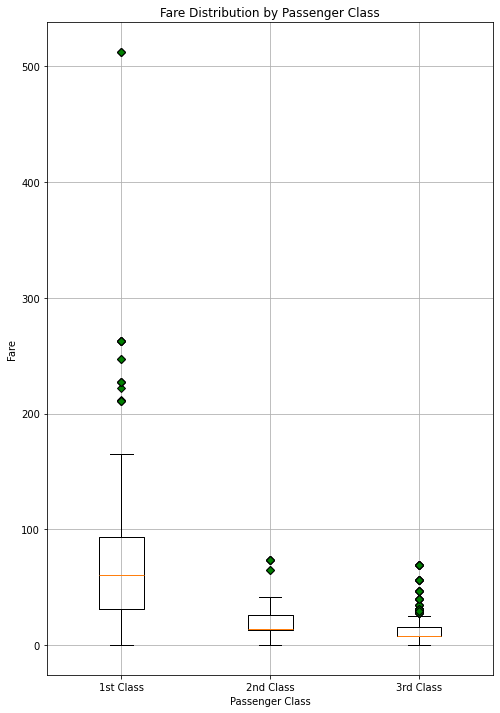

In [190]:
# create a boxplot of fare by passenger class
plt.figure(figsize=(8,12))
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot([train_df[train_df['Pclass']==1]['Fare'],
             train_df[train_df['Pclass']==2]['Fare'],
             train_df[train_df['Pclass']==3]['Fare']],
            labels=['1st Class', '2nd Class', '3rd Class'] , flierprops=green_diamond)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid()
plt.show()

# (C)

#### Building and Training a Random Forest Model

The goal of this section is to create a Random Forest classifier with default hyperparameters and train it on the Titanic dataset. Before building the model, several preprocessing steps are necessary:

- Non-numeric categorical columns such as `Sex`, `Embarked`, and `Cabin` are converted into numerical values to ensure compatibility with the machine learning algorithm.
- Features like `Ticket` and `PassengerId` are dropped because they do not provide significant predictive power, and information from `Ticket` is already covered by other features such as `Cabin` and `Fare`.
  
After preprocessing, the data is normalized using the MinMaxScaler to ensure the features are on the same scale, which improves the performance of the model. The label (`Survived`) is separated from the dataset to avoid any data leakage.


In [191]:
categories = {"female": 1, "male": 0}
train_df['Sex']= train_df['Sex'].map(categories)
test_df['Sex']= test_df['Sex'].map(categories)
# ------------------------------------------------------------
categories = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked']= train_df['Embarked'].map(categories)
test_df['Embarked']= test_df['Embarked'].map(categories)
# ------------------------------------------------------------
categories = train_df.Cabin.unique()
train_df['Cabin'] = train_df.Cabin.astype("category").cat.codes
test_df['Cabin'] = test_df.Cabin.astype("category").cat.codes

*In my opinion, the features related to the ticket characters and passenger IDs are not very useful, so I decided to remove them. Although the ticket columns might provide some information about the passengers' positions, this information is already fully covered by other columns like Cabin and Fare.*

In [192]:
train_df = train_df.drop(['Ticket_characters','Ticket_FirstLetter','PassengerId'], axis=1)
test_df  = test_df.drop(['Ticket_characters','Ticket_FirstLetter','PassengerId'], axis=1)

In [193]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,8,1
1,1,1,1,38.000000,1,0,71.2833,2,2
2,1,3,1,26.000000,0,0,7.9250,8,1
3,1,1,1,35.000000,1,0,53.1000,2,1
4,0,3,0,35.000000,0,0,8.0500,8,1
5,0,3,0,33.118395,0,0,8.4583,8,3
6,0,1,0,54.000000,0,0,51.8625,4,1
7,0,3,0,2.000000,3,1,21.0750,8,1
8,1,3,1,27.000000,0,2,11.1333,8,1
9,1,2,1,14.000000,1,0,30.0708,8,2


In [194]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,0,34.5,0,0,7.8292,7,3,0.0
1,3,1,47.0,1,0,7.0000,7,1,1.0
2,2,0,62.0,0,0,9.6875,7,3,0.0
3,3,0,27.0,0,0,8.6625,7,1,0.0
4,3,1,22.0,1,1,12.2875,7,1,1.0
5,3,0,14.0,0,0,9.2250,7,1,1.0
6,3,1,30.0,0,0,7.6292,7,3,1.0
7,2,0,26.0,1,1,29.0000,1,1,1.0
8,3,1,18.0,0,0,7.2292,7,2,1.0
9,3,0,21.0,2,0,24.1500,7,1,0.0


## Data Normalization :

In [195]:
# Dropping label

y_train = train_df['Survived']
train_df = train_df.drop('Survived', axis=1)  # Dropping label to normalize

y_test = test_df['Survived']
test_df = test_df.drop('Survived', axis=1)  # Dropping label to normalize


In [196]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_df)
scaled_test = scaler.transform(test_df)

scaled_train = pd.DataFrame(scaled_train, columns=train_df.columns, index=train_df.index)
scaled_test  = pd.DataFrame(scaled_test, columns=test_df.columns, index=test_df.index)

In [197]:
scaled_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,0.0,0.271174,0.125,0.000000,0.014151,1.00,0.0
1,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.25,0.5
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.00,0.0
3,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.25,0.0
4,1.0,0.0,0.434531,0.000,0.000000,0.015713,1.00,0.0
5,1.0,0.0,0.410887,0.000,0.000000,0.016510,1.00,1.0
6,0.0,0.0,0.673285,0.000,0.000000,0.101229,0.50,0.0
7,1.0,0.0,0.019854,0.375,0.166667,0.041136,1.00,0.0
8,1.0,1.0,0.334004,0.000,0.333333,0.021731,1.00,0.0
9,0.5,1.0,0.170646,0.125,0.000000,0.058694,1.00,0.5


In [198]:
scaled_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,0.0,0.428248,0.000,0.000000,0.015282,0.875,1.0
1,1.0,1.0,0.585323,0.125,0.000000,0.013663,0.875,0.0
2,0.5,0.0,0.773813,0.000,0.000000,0.018909,0.875,1.0
3,1.0,0.0,0.334004,0.000,0.000000,0.016908,0.875,0.0
4,1.0,1.0,0.271174,0.125,0.166667,0.023984,0.875,0.0
5,1.0,0.0,0.170646,0.000,0.000000,0.018006,0.875,0.0
6,1.0,1.0,0.371701,0.000,0.000000,0.014891,0.875,1.0
7,0.5,0.0,0.321438,0.125,0.166667,0.056604,0.125,0.0
8,1.0,1.0,0.220910,0.000,0.000000,0.014110,0.875,0.5
9,1.0,0.0,0.258608,0.250,0.000000,0.047138,0.875,0.0


In [199]:
# making a copy of this dataframe for part D 
D_test = scaled_test.copy()

#### Training the Random Forest Model

A Random Forest classifier is built and trained on the normalized training data. We then use this model to predict the test data. The performance of the model is evaluated using accuracy, and a confusion matrix is generated to give a detailed breakdown of correct and incorrect classifications.


In [200]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_train, y_train)

RandomForestClassifier()

In [201]:
y_pred = clf.predict(scaled_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

scaled_test['Survival_Predictions'] = pd.Series(y_pred)
scaled_test.head()

   Accuracy: 0.7177033492822966
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       271
         1.0       0.59      0.65      0.62       147

    accuracy                           0.72       418
   macro avg       0.69      0.70      0.70       418
weighted avg       0.72      0.72      0.72       418



,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survival_Predictions
0,1.0,0.0,0.428248,0.000,0.000000,0.015282,0.875,1.0,0
1,1.0,1.0,0.585323,0.125,0.000000,0.013663,0.875,0.0,0
2,0.5,0.0,0.773813,0.000,0.000000,0.018909,0.875,1.0,0
3,1.0,0.0,0.334004,0.000,0.000000,0.016908,0.875,0.0,1
4,1.0,1.0,0.271174,0.125,0.166667,0.023984,0.875,0.0,0


# (D)

## Hyperparameter Tuning with GridSearchCV for Random Forest Classifier

In this section, we use `GridSearchCV` to tune hyperparameters for the Random Forest classifier and evaluate the model performance on the test dataset. 

### Steps:

1. **Define the Hyperparameter Grid:**

   We start by specifying a grid of hyperparameters to search over. This includes:
   - `criterion`: The function to measure the quality of a split. Possible values are `'gini'` and `'entropy'`.
   - `min_samples_leaf`: The minimum number of samples required to be at a leaf node. We test values `[1, 3, 5]`.
   - `min_samples_split`: The minimum number of samples required to split an internal node. We test values `[2, 4, 6]`.
   - `n_estimators`: The number of trees in the forest. We test values `[50, 100, 150]`.

   ```python
   param_grid = {
       'criterion': ['gini', 'entropy'],
       'min_samples_leaf': [1, 3, 5],
       'min_samples_split': [2, 4, 6],
       'n_estimators': [50, 100, 150]
   }


2. **Create and Configure GridSearchCV:**

   Create a `RandomForestClassifier` instance and use `GridSearchCV` to perform an exhaustive search over the hyperparameter grid. Use 5-fold cross-validation (`cv=5`) to evaluate the performance of each parameter combination.


3. **Report Best Hyperparameters and Accuracy:**

   After fitting, `GridSearchCV` provides the best hyperparameters and the corresponding accuracy score. Print these to understand which hyperparameters yielded the best performance.


4. **Train a Model with the Best Hyperparameters:**

   Train a new `RandomForestClassifier` using the best hyperparameters found during the grid search.

5. **Evaluate the Model on the Test Set:**

   Evaluate the performance of the tuned model on the test set. Compute the accuracy score and print it to assess how well the model generalizes to unseen data.


### Summary

This process allows us to systematically find the best hyperparameters for our Random Forest model and ensures that we maximize its performance. By using `GridSearchCV`, we automate the hyperparameter tuning process and validate the effectiveness of our model on the test dataset.


In [202]:
D_train = scaled_train.copy()
# I have already made D_test In the previous part.

In [203]:
D_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,0.0,0.428248,0.000,0.000000,0.015282,0.875,1.0
1,1.0,1.0,0.585323,0.125,0.000000,0.013663,0.875,0.0
2,0.5,0.0,0.773813,0.000,0.000000,0.018909,0.875,1.0
3,1.0,0.0,0.334004,0.000,0.000000,0.016908,0.875,0.0
4,1.0,1.0,0.271174,0.125,0.166667,0.023984,0.875,0.0


In [204]:
# define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [50, 100, 150]
}

# create a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(D_train, y_train)

# print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# train a new model using the best hyperparameters
best_params = grid_search.best_params_
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(D_train, y_train)

# evaluate the model on the test set
y_pred = rfc.predict(D_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_acc)

Best hyperparameters:  {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.8294394576611637
Test accuracy:  0.7464114832535885


# (E)

## Feature Importance and Model Re-training

In this section, we will evaluate feature importance, remove the least important feature, and retrain the model. Finally, we will calculate the accuracy of the retrained model on the test dataset.

### Steps:

1. **Report Feature Importance:**

   First, we calculate and visualize the feature importance scores from the initial Random Forest model. This will help us identify which features are most influential in making predictions.

2. **Remove the Least Important Feature:**

   Based on the feature importance scores, identify and remove the feature with the lowest importance. In this example, the feature `'Embarked'` is removed.

3. **Re-tune Hyperparameters Using GridSearchCV:**

   We define the hyperparameter grid, create a new `RandomForestClassifier`, and use `GridSearchCV` to find the best hyperparameters with the updated feature set.

4. **Train a New Model with the Best Hyperparameters:**

   Train a new `RandomForestClassifier` using the best hyperparameters identified in the previous step.

5. **Evaluate the Retrained Model on the Test Set:**

   Finally, we evaluate the performance of the retrained model on the test set and compute the accuracy score.


### Summary

This process allows us to understand the importance of each feature in our model, remove the least significant ones, and re-tune the model to potentially improve its performance. By retraining the model with the selected features and best hyperparameters, we aim to enhance the accuracy and efficiency of our predictions.

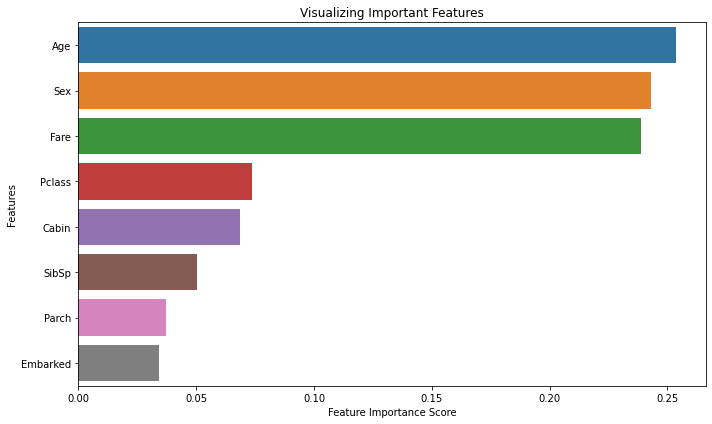

In [205]:
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

The features are listed in order of importance in the plot above. As requested, we will remove the least important feature and then repeat the previous steps.

In [206]:
D_test  = D_test.drop('Embarked', axis=1)  # Dropping label to normalize
D_train = D_train.drop('Embarked', axis=1)  # Dropping label to normalize

In [207]:
# define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [50, 100, 150]
}

# create a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(D_train, y_train)

# print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# train a new model using the best hyperparameters
best_params = grid_search.best_params_
rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(D_train, y_train)

# evaluate the model on the test set
y_pred = rfc.predict(D_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_acc)

Best hyperparameters:  {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.8327976900382901
Test accuracy:  0.7679425837320574


# Conclusion:

Removing the least important feature and re-tuning the hyperparameters led to a noticeable improvement in test accuracies. This indicates that the feature removal step was beneficial for enhancing model performance, and the new set of hyperparameters with the 'gini' criterion appears to better optimize the model's predictive capabilities.

In summary, the feature importance analysis provided valuable insights that helped in refining the model, leading to improved results in both cross-validation and test scenarios.